In [1]:
import numpy as np

np.random.seed(29)

def MSEStep(X, y, W, b, lr = 0.005):
    """
    This function implements the gradient descent step for squared error as a performance metric
    
    Parameters:
    X: Array of Predictor Features
    y: Array of Outcome Values
    W: Predictor Features Coefficients
    b: Regression Function Intercept
    lr: learning rate
    
    Returns:
    W_new: Predictor Feature Coefficients following Gradient Descent Step
    b_new: Intercept following Gradient Descent Step
    """
    # Compute Errors
    y_pred = np.matmul(X,W) + b
    error = y - y_pred
    
    # Compute Steps
    W_new = W + lr * np.matmul(error, X)
    b_new = b + lr * error.sum()
    return W_new, b_new

In [7]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.

def miniBatchGD(X, y, batch_size=20, learn_rate=0.005, num_iter=25):
    """
    This function performs mini-batch gradient descent on a given dataset.
    
    Parameters:
    X: Array of Predictor Features
    y: Array of Outcome Values
    batch_size: How many data points will be sampled for each iteration
    learn_rate: learning rate
    num_iter: Number of Batches used
    
    Returns:
    regression_coef: Array of Slopes and Intercepts generated by gradient descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # Coefficients
    b = 0 # Intercept
    
    # Run Iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    return regression_coef

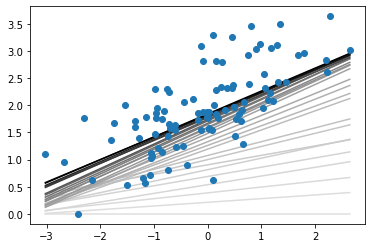

In [14]:
if __name__ == "__main__":
    # Perform Gradient Descent
    data = np.loadtxt('Datasets/MiniBatch.csv', delimiter=',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # Plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max], [X_min * W + b, X_max * W + b], color=color)
    plt.scatter(X, y, zorder=3)
    plt.show()